# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [4]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [5]:
from sklearn.model_selection import train_test_split

# Separar características (X) y variable objetivo (y)
X = data.drop('MEDV', axis=1)  # todas las columnas excepto MEDV
y = data['MEDV']               # solo la columna MEDV

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones
print("Dimensiones del conjunto de entrenamiento:", X_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape)

Dimensiones del conjunto de entrenamiento: (404, 13)
Dimensiones del conjunto de prueba: (102, 13)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [6]:
from sklearn.linear_model import LinearRegression

# Crear y entrenar el modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Generar predicciones
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

# Opcional: ver los primeros resultados
print("Primeras 5 predicciones del conjunto de entrenamiento:")
print(y_pred_train[:5])
print("\nPrimeros 5 valores reales del conjunto de entrenamiento:")
print(y_train.iloc[:5].values)

Primeras 5 predicciones del conjunto de entrenamiento:
[10.96952405 19.41196567 23.06419602 12.1470648  18.3738116 ]

Primeros 5 valores reales del conjunto de entrenamiento:
[12.  19.9 19.4 13.4 18.2]


## 3. Calculate and print R-squared for both the training and the testing set.

In [7]:
from sklearn.metrics import r2_score

# Calcular R² para el conjunto de entrenamiento
r2_train = r2_score(y_train, y_pred_train)

# Calcular R² para el conjunto de prueba
r2_test = r2_score(y_test, y_pred_test)

# Imprimir resultados
print("R² en conjunto de entrenamiento:", round(r2_train, 4))
print("R² en conjunto de prueba:", round(r2_test, 4))

R² en conjunto de entrenamiento: 0.7509
R² en conjunto de prueba: 0.6688


## 4. Calculate and print mean squared error for both the training and the testing set.

In [8]:
from sklearn.metrics import mean_squared_error

# Calcular MSE para el conjunto de entrenamiento
mse_train = mean_squared_error(y_train, y_pred_train)

# Calcular MSE para el conjunto de prueba
mse_test = mean_squared_error(y_test, y_pred_test)

# Calcular RMSE (opcional, pero útil ya que está en las mismas unidades que la variable objetivo)
rmse_train = mean_squared_error(y_train, y_pred_train, squared=False)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

# Imprimir resultados
print("MSE en conjunto de entrenamiento:", round(mse_train, 4))
print("MSE en conjunto de prueba:", round(mse_test, 4))
print("\nRMSE en conjunto de entrenamiento:", round(rmse_train, 4))
print("RMSE en conjunto de prueba:", round(rmse_test, 4))

MSE en conjunto de entrenamiento: 21.6414
MSE en conjunto de prueba: 24.2911

RMSE en conjunto de entrenamiento: 4.652
RMSE en conjunto de prueba: 4.9286


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [9]:
from sklearn.metrics import mean_absolute_error

# Calcular MAE para el conjunto de entrenamiento
mae_train = mean_absolute_error(y_train, y_pred_train)

# Calcular MAE para el conjunto de prueba
mae_test = mean_absolute_error(y_test, y_pred_test)

# Imprimir resultados
print("MAE en conjunto de entrenamiento:", round(mae_train, 4))
print("MAE en conjunto de prueba:", round(mae_test, 4))

MAE en conjunto de entrenamiento: 3.3148
MAE en conjunto de prueba: 3.1891


## Classification Model Evaluation

In [10]:
from sklearn.datasets import load_iris
data = load_iris()

In [11]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [12]:
column_names = data.feature_names

In [13]:
df = pd.DataFrame(data['data'],columns=column_names)

In [14]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
target = pd.DataFrame(data.target)

In [16]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [17]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [18]:
from sklearn.model_selection import train_test_split

# Separar características (X) y variable objetivo (y)
X = df  # todas las características
y = target  # variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones
print("Dimensiones del conjunto de entrenamiento:", X_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape)

Dimensiones del conjunto de entrenamiento: (120, 4)
Dimensiones del conjunto de prueba: (30, 4)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [19]:
from sklearn.linear_model import LogisticRegression

# Crear y entrenar el modelo
modelo = LogisticRegression(random_state=42)
modelo.fit(X_train, y_train.values.ravel())

# Generar predicciones
y_pred_train = modelo.predict(X_train)
y_pred_test = modelo.predict(X_test)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [20]:
from sklearn.metrics import accuracy_score

# Calcular accuracy para el conjunto de entrenamiento
acc_train = accuracy_score(y_train, y_pred_train)

# Calcular accuracy para el conjunto de prueba
acc_test = accuracy_score(y_test, y_pred_test)

print("Accuracy en conjunto de entrenamiento:", round(acc_train, 4))
print("Accuracy en conjunto de prueba:", round(acc_test, 4))

Accuracy en conjunto de entrenamiento: 0.975
Accuracy en conjunto de prueba: 1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [21]:
from sklearn.metrics import balanced_accuracy_score

# Calcular balanced accuracy para el conjunto de entrenamiento
bal_acc_train = balanced_accuracy_score(y_train, y_pred_train)

# Calcular balanced accuracy para el conjunto de prueba
bal_acc_test = balanced_accuracy_score(y_test, y_pred_test)

print("Balanced accuracy en conjunto de entrenamiento:", round(bal_acc_train, 4))
print("Balanced accuracy en conjunto de prueba:", round(bal_acc_test, 4))

Balanced accuracy en conjunto de entrenamiento: 0.9756
Balanced accuracy en conjunto de prueba: 1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [22]:
from sklearn.metrics import precision_score

# Calcular precision para el conjunto de entrenamiento
prec_train = precision_score(y_train, y_pred_train, average='weighted')

# Calcular precision para el conjunto de prueba
prec_test = precision_score(y_test, y_pred_test, average='weighted')

print("Precision en conjunto de entrenamiento:", round(prec_train, 4))
print("Precision en conjunto de prueba:", round(prec_test, 4))

Precision en conjunto de entrenamiento: 0.9768
Precision en conjunto de prueba: 1.0


## 11. Calculate and print the recall score for both the training and the testing set.

In [23]:
from sklearn.metrics import recall_score

# Calcular recall para el conjunto de entrenamiento
recall_train = recall_score(y_train, y_pred_train, average='weighted')

# Calcular recall para el conjunto de prueba
recall_test = recall_score(y_test, y_pred_test, average='weighted')

print("Recall en conjunto de entrenamiento:", round(recall_train, 4))
print("Recall en conjunto de prueba:", round(recall_test, 4))

Recall en conjunto de entrenamiento: 0.975
Recall en conjunto de prueba: 1.0


## 12. Calculate and print the F1 score for both the training and the testing set.

In [24]:
from sklearn.metrics import f1_score

# Calcular F1 para el conjunto de entrenamiento
f1_train = f1_score(y_train, y_pred_train, average='weighted')

# Calcular F1 para el conjunto de prueba
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print("F1-score en conjunto de entrenamiento:", round(f1_train, 4))
print("F1-score en conjunto de prueba:", round(f1_test, 4))

F1-score en conjunto de entrenamiento: 0.975
F1-score en conjunto de prueba: 1.0


## 13. Generate confusion matrices for both the training and the testing set.

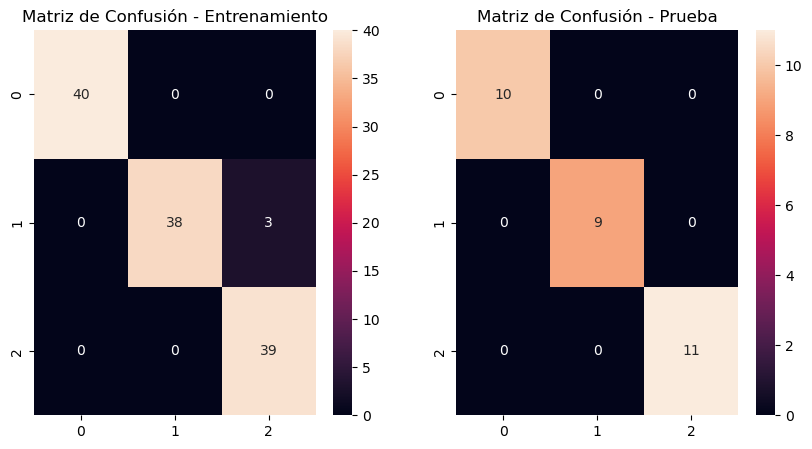

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Matriz de confusión para el conjunto de entrenamiento
cm_train = confusion_matrix(y_train, y_pred_train)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(cm_train, annot=True, fmt='d')
plt.title('Matriz de Confusión - Entrenamiento')

# Matriz de confusión para el conjunto de prueba
cm_test = confusion_matrix(y_test, y_pred_test)
plt.subplot(1,2,2)
sns.heatmap(cm_test, annot=True, fmt='d')
plt.title('Matriz de Confusión - Prueba')
plt.show()

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

Comparación de modelos:
                Modelo  Accuracy_Train  Accuracy_Test  Precision_Train  \
0  Regresión Logística          0.9750            1.0           0.9768   
1    Árbol de Decisión          1.0000            1.0           1.0000   
2        Random Forest          1.0000            1.0           1.0000   
3                  SVM          0.9750            1.0           0.9752   
4                  KNN          0.9667            1.0           0.9675   

   Precision_Test  Recall_Train  Recall_Test  F1_Train  F1_Test  
0             1.0        0.9750          1.0    0.9750      1.0  
1             1.0        1.0000          1.0    1.0000      1.0  
2             1.0        1.0000          1.0    1.0000      1.0  
3             1.0        0.9750          1.0    0.9750      1.0  
4             1.0        0.9667          1.0    0.9667      1.0  


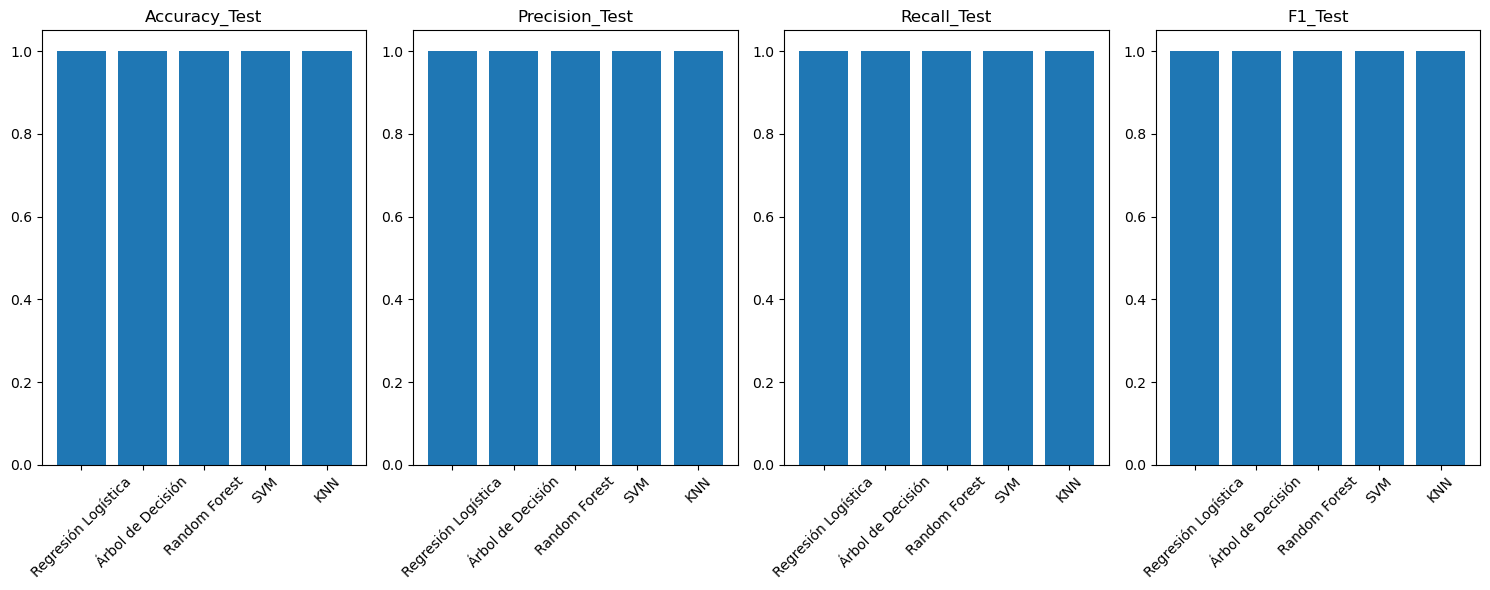


Comparación de modelos de regresión:
              Modelo  MSE_Train  MSE_Test  R2_Train  R2_Test
0   Regresión Lineal     0.0491    0.0371    0.9254   0.9469
1  Árbol de Decisión     0.0000    0.0000    1.0000   1.0000
2      Random Forest     0.0062    0.0014    0.9905   0.9980


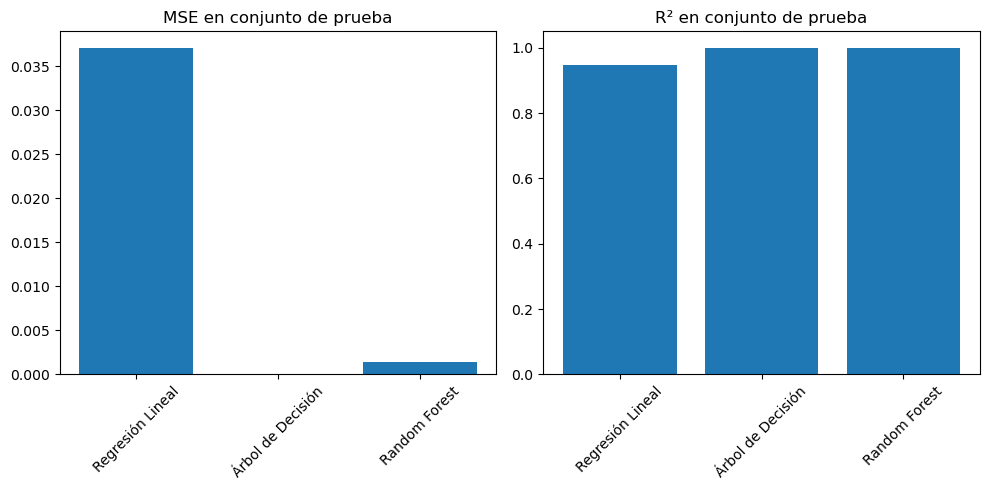

In [27]:
# Importar los modelos necesarios
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Importar métricas de evaluación
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Crear un diccionario con los modelos
modelos = {
    'Regresión Logística': LogisticRegression(random_state=42),
    'Árbol de Decisión': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier()
}

# Lista para almacenar los resultados
resultados_lista = []

# Entrenar y evaluar cada modelo
for nombre, modelo in modelos.items():
    # Entrenar el modelo
    modelo.fit(X_train, y_train.values.ravel())
    
    # Hacer predicciones
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)
    
    # Calcular métricas
    resultados_lista.append({
        'Modelo': nombre,
        'Accuracy_Train': round(accuracy_score(y_train, y_pred_train), 4),
        'Accuracy_Test': round(accuracy_score(y_test, y_pred_test), 4),
        'Precision_Train': round(precision_score(y_train, y_pred_train, average='weighted'), 4),
        'Precision_Test': round(precision_score(y_test, y_pred_test, average='weighted'), 4),
        'Recall_Train': round(recall_score(y_train, y_pred_train, average='weighted'), 4),
        'Recall_Test': round(recall_score(y_test, y_pred_test, average='weighted'), 4),
        'F1_Train': round(f1_score(y_train, y_pred_train, average='weighted'), 4),
        'F1_Test': round(f1_score(y_test, y_pred_test, average='weighted'), 4)
    })

# Crear DataFrame con los resultados
resultados = pd.DataFrame(resultados_lista)

# Mostrar resultados
print("Comparación de modelos:")
print(resultados)

# Visualizar resultados con un gráfico de barras
plt.figure(figsize=(15, 6))
for i, metrica in enumerate(['Accuracy_Test', 'Precision_Test', 'Recall_Test', 'F1_Test']):
    plt.subplot(1, 4, i+1)
    plt.bar(resultados['Modelo'], resultados[metrica])
    plt.title(metrica)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Para el conjunto de datos de regresión (Boston Housing)
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Crear modelos de regresión
modelos_regresion = {
    'Regresión Lineal': LinearRegression(),
    'Árbol de Decisión': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Lista para almacenar resultados de regresión
resultados_regresion_lista = []

# Evaluar modelos de regresión
for nombre, modelo in modelos_regresion.items():
    modelo.fit(X_train, y_train)
    y_pred_train = modelo.predict(X_train)
    y_pred_test = modelo.predict(X_test)
    
    resultados_regresion_lista.append({
        'Modelo': nombre,
        'MSE_Train': round(mean_squared_error(y_train, y_pred_train), 4),
        'MSE_Test': round(mean_squared_error(y_test, y_pred_test), 4),
        'R2_Train': round(r2_score(y_train, y_pred_train), 4),
        'R2_Test': round(r2_score(y_test, y_pred_test), 4)
    })

# Crear DataFrame con los resultados de regresión
resultados_regresion = pd.DataFrame(resultados_regresion_lista)

print("\nComparación de modelos de regresión:")
print(resultados_regresion)

# Visualizar resultados de regresión
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(resultados_regresion['Modelo'], resultados_regresion['MSE_Test'])
plt.title('MSE en conjunto de prueba')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(resultados_regresion['Modelo'], resultados_regresion['R2_Test'])
plt.title('R² en conjunto de prueba')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()